GaussianNB 'test' accuracy: 0.8333333333333334
SGDClassifier 'test' accuracy: 0.9533333333333334
SVC 'test' accuracy: 0.9822222222222222 

total misclassifications (SVC): 8 

pred actual
7    2
1    8
7    9
9    5
4    7
4    3
2    8
4    1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      0.98      0.98        43
           2       0.98      0.98      0.98        44
           3       1.00      0.98      0.99        45
           4       0.93      1.00      0.96        38
           5       1.00      0.98      0.99        48
           6       1.00      1.00      1.00        52
           7       0.96      0.98      0.97        48
           8       1.00      0.96      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

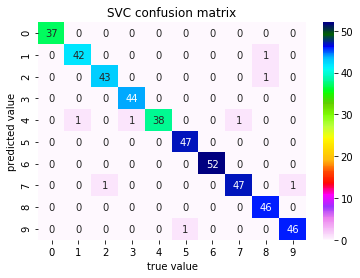

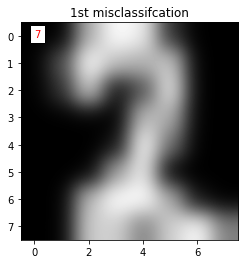

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def find_misses(test, pred):
    return [i for i, row in enumerate(test) if row != pred[i]]

if __name__ == "__main__":
    br = '\n'
    digits = load_digits()
    X = digits.data
    y = digits.target
    X_train, X_test, y_train, y_test = train_test_split\
                                       (X, y, random_state=0)
    gnb = GaussianNB().fit(X_train, y_train)
    gnb_name = gnb.__class__.__name__
    y_pred = gnb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print (gnb_name + ' \'test\' accuracy:', accuracy)
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.fit_transform(X_test)
    sgd = SGDClassifier(random_state=0, max_iter=1000,
                        tol=0.001)
    sgd_name = sgd.__class__.__name__
    sgd.fit(X_train_std, y_train)
    y_pred = sgd.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    print (sgd_name + ' \'test\' accuracy:', accuracy)
    svm = SVC(gamma='auto').fit(X_train_std, y_train)
    svm_name = svm.__class__.__name__
    y_pred = svm.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    print (svm_name + ' \'test\' accuracy:', accuracy, br)
    indx = find_misses(y_test, y_pred)
    print ('total misclassifications (' + str(svm_name) +\
           '):', len(indx), br)
    print ('pred', 'actual')
    misses = [(y_pred[row], y_test[row], i)
              for i, row in enumerate(indx)]
    [print (row[0], '  ', row[1]) for row in misses]
    img_indx = misses[0][2]
    img_pred = misses[0][0]
    img_act = misses[0][1]
    text = str(img_pred)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(1)
    ax = plt.axes()
    sns.heatmap(cm.T, annot=True, fmt="d",
                cmap='gist_ncar_r', ax=ax)
    title = svm_name + ' confusion matrix'
    ax.set_title(title)
    plt.xlabel('true value')
    plt.ylabel('predicted value')
    test_images = X_test.reshape(-1, 8, 8)
    plt.figure(2)
    plt.title('1st misclassifcation')
    plt.imshow(test_images[img_indx], cmap='gray',
               interpolation='gaussian')
    plt.text(0, 0.05, text, color='r',
             bbox=dict(facecolor='white'))
    plt.show()